# Support vector classification implementation
first check which kernel is best for u ithout huperparamter tunning
then do gridserach 
over here rbf is done correctly f=donot look at poly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.datasets import make_classification

In [6]:
x,y = make_classification( n_samples=1000,n_features=2,n_classes=2,  n_redundant=0,n_clusters_per_class=1)

In [7]:
x

array([[ 1.37085553, -0.57220418],
       [ 0.99314037, -1.52571064],
       [ 1.53623896, -0.78967466],
       ...,
       [-1.79201098,  1.01650868],
       [-0.66099158,  1.20407688],
       [ 0.9096464 , -1.64244195]])

In [8]:
y

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,

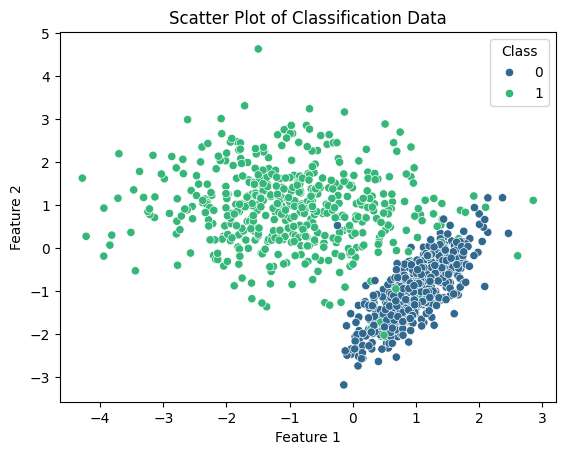

In [11]:
df = pd.DataFrame(x, columns=['Feature 1', 'Feature 2'])
df['Class'] = y

# Plot using seaborn
sns.scatterplot(data=df, x='Feature 1', y='Feature 2', hue='Class', palette='viridis')

# Show the plot
plt.title('Scatter Plot of Classification Data')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.25 , random_state = 42) 

In [12]:
from sklearn.svm import SVC
svc= SVC(kernel = 'rbf' )

In [15]:
svc.fit(x_train,y_train)

SVC()

In [16]:
## Prediction
y_pred = svc.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [19]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.972
[[125   0]
 [  7 118]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       125
           1       1.00      0.94      0.97       125

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



The accuracy of your model is 97.2%. This means that 97.2% of the predictions made by your model were correct.
#### Confusion matrix
True Positives (TP): 118 (The number of positive class samples correctly classified as positive)
True Negatives (TN): 125 (The number of negative class samples correctly classified as negative)
False Positives (FP): 0 (The number of negative class samples incorrectly classified as positive)
False Negatives (FN): 7 (The number of positive class samples incorrectly classified as negative)
# Classfication Report 
Precision: The ratio of correctly predicted positive observations to the total predicted positives. For class 0, precision is 0.95, and for class 1, it's 1.00.

Recall: The ratio of correctly predicted positive observations to all observations in the actual class. For class 0, recall is 1.00, and for class 1, it's 0.94.

F1-score: The weighted average of Precision and Recall. It provides a single metric to evaluate the model. For both classes, the F1-score is 0.97.

Support: The number of actual occurrences of the class in the dataset. Each class has 125 samples in the test set.

Macro Average: Average of precision, recall, and F1-score across all classes, treating all classes equally.

Weighted Average: Average of precision, recall, and F1-score, weighted by the number of true instances for each class.

## HyperParameter Tunning

In [32]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Best parameter and score
best_C = grid_search.best_params_['C']
print("Best C value:", best_C)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Train and evaluate the model with the best parameter
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Output performance metrics
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best C value: 100
Best Cross-Validation Accuracy: 0.9693333333333334
Test Accuracy: 0.976
Confusion Matrix:
 [[125   0]
 [  6 119]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       125
           1       1.00      0.95      0.98       125

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



### Performance: 
Your model is performing exceptionally well, with high accuracy and balanced metrics for both precision and recall across classes.
### Optimal Parameters: 
The chosen C value of 100 has yielded very high performance, confirming it is a suitable choice for your SVM model with an RBF kernel.
### Test Results: 
The test results show that the model generalizes well to new data, with very few misclassifications.

In [44]:
from sklearn.svm import SVC
svc = SVC(kernel='poly', C=0.1, coef0=0.5, degree=4, gamma='auto')

In [45]:
svc.fit(x_train,y_train)

SVC(C=0.1, coef0=0.5, degree=4, gamma='auto', kernel='poly')

In [46]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.976
[[125   0]
 [  6 119]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       125
           1       1.00      0.95      0.98       125

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



# Huper parameter tunning

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3, 4],
    'coef0': [0, 0.5, 1],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'C': 0.1, 'coef0': 0.5, 'degree': 4, 'gamma': 'auto'}
